# Truncated Multivariate Normal

## Bivariate Normal

Let $x$ and $y$ be distributed as a bivariate normal distribution, with means $\mu_1$ and $\mu_2$, standard deviations $\sigma_1$ and $\sigma_2$, and scale-free measure of correlation $r=\text{Cov}(x,y)/\sigma_x\sigma_y$.

Then the probability density is given by

$f(x,y) = \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-r^2}}\exp\left[ -\frac{1}{2(1-r^2)}\left[ \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - \frac{2r(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y} \right] \right]$

Selection intensity is given by:

intensity $ = \frac{\phi\left (\Phi^{-1}(1-\xi) \right)}{\xi}$, where

$\xi = z/100$ is the fraction of the population selected ($z$ is percent)

$\phi(x)$ is the Probability Density Function (PDF) for a normal distribution \
  $\phi(x) = $ dnorm in R  
  
$\Phi(x)$ is the Cumulative Density Function (CDF) for a normal distribution \
  $\Phi(x) = $ pnorm in R 
  
$\Phi^{-1}(x)$ is the Quantile for a normal distribution \
  $\Phi^{-1}(x) = $ qnorm in R

## Matrix Formulation for Multivariate Normal

Let the $m$ variables ${\bf X}=[x_1,x_2,\dots,x_m]$ follow a multivariate normal distribution, with means ${\bf\mu}=[\mu_1,\mu_2,\dots,\mu_m]$, and $m\times m$ correlation matrix ${\bf\Sigma}=\Sigma_{i,j}=\text{Cov}(x_i,x_j)$.

Then the probability density is given by

$f({\bf X}) = \frac{1}{\sqrt{(2\pi)^m|{\bf \Sigma}|}} \exp\left[ -\frac{1}{2}\left({\bf X}-{\bf \mu}\right)^T {\bf \Sigma}^{-1}\left({\bf X}-{\bf \mu}\right)  \right]$

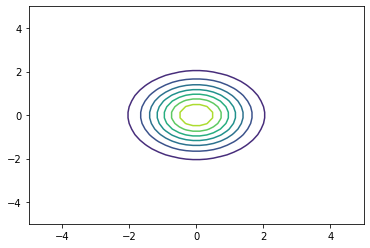

In [1]:
import numpy as np
from scipy.stats import multivariate_normal

# initialize matrices
Mu = np.array([0,0])
Cov = np.eye(2)

# create MVN distribution`
MVNdist = multivariate_normal(mean=Mu, cov=Cov)
  # x1 = 0
  # x2 = 0
  # X = np.array([x1,x2])
  # z = MVNdist.pdf(X)
  # print(z)

# ----------------------
import matplotlib.pyplot as plt 

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 40)

xs, ys= np.meshgrid(x, y)

z = MVNdist.pdf(np.dstack((xs,ys)))

# make contour plot
plt.contour(x,y,z)
plt.show()

In [3]:
# def tnormPDF(distribution, fracselected):
#     
#     cutoffthreshold = distribution.ppf(fracselected)
#     
#     return 1
# 
# tnormPDF(MVNdist, 100)

## Truncated Normal

Integral: (1.0000000000000278, 5.257570490080354e-09)


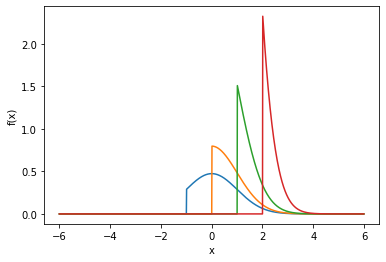

In [32]:
from scipy.stats import norm

def PDF_truncnorm(x, mu, sigma, xmin=-float('inf'), xmax=float('inf')):
    """
    Return probability density at x for truncated normal distribution
    defined by parameters mu, sigma
    lower/upper bounds at xmin/xmax
    """
    # PDF = 0 outside of bounds
    if (x<xmin or x>xmax):
     return 0
    
    # inside bounds
    else:
     dist = norm(loc=mu, scale=sigma)
     # dist must be renormalized such that the total integral = 1
     L = norm.cdf(xmax)-norm.cdf(xmin)
     #print(L)
    
     return norm.pdf(x)/L
    

PDF_truncnorm(2.1,0,1,xmin=2)

# check integral
from scipy.integrate import quad
#I = quad(PDF_truncnorm, -np.inf, np.inf, args=(0,1))
I = quad(PDF_truncnorm, -np.inf, np.inf, args=(0,1,2))
print("Integral: {}".format(I))

# plotting
fig, ax = plt.subplots()
x= np.arange(-6,6,0.01)
y1=[]
y2=[]
y3=[]
y4=[]
for anx in x:
    y1.append(PDF_truncnorm(anx,0,1,xmin=-1))
    y2.append(PDF_truncnorm(anx,0,1,xmin=0))
    y3.append(PDF_truncnorm(anx,0,1,xmin=1))
    y4.append(PDF_truncnorm(anx,0,1,xmin=2))
#print(x)
#print(y)
#ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
#ax.set_ylim(0,0.45)
plt.show()